In [1]:
import numpy as np
from PIL import Image, ImageDraw
from acl_model import Model
import cv2
import matplotlib.pyplot as plt
from time import time
import os

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
device_id = 0
input_size = 416
model_path = "./model/yolov3_caffe_416_no_csc.om"

In [4]:
# %timeit -n 50 -r 5
model = Model(device_id, model_path, input_size, input_size)

part 1 takes  9.298324584960938e-06
[ACL] init resource stage:
[ACL] init resource stage success
[Model] class Model init resource stage:
[Model] create model output dataset:
[Model] create model output dataset success
model input size 2
input  0
model input dims ({'name': 'data', 'dimCount': 4, 'dims': [1, 416, 416, 3]}, 0)
model input datatype 4
input  1
model input dims ({'name': 'img_info', 'dimCount': 2, 'dims': [1, 4]}, 0)
model input datatype 0
model output size 2
output  0
model output dims ({'name': 'detection_out3:0:box_out', 'dimCount': 2, 'dims': [1, 6144]}, 0)
model output datatype 0
output  1
model output dims ({'name': 'detection_out3:1:box_out_num', 'dimCount': 2, 'dims': [1, 8]}, 0)
model output datatype 3
[Model] class Model init resource stage success


In [5]:
img_dict = {"path": "./data/dog.jpg", "dtype": np.uint8}

In [6]:
img_org_bgr = cv2.imread(img_dict["path"])

In [7]:
%timeit -n 50 -r 10 
boxes = model.run(img_org_bgr)

img_resized shape (416, 416, 3)
66164688
img_buf_size 519168
[Model] create model input dataset:
[Model] create model input dataset success
[Model] execute stage:
[Model] execute stage success


In [8]:
with open("data/coco.names") as fd:
    coco_labels = fd.readlines()

coco_labels = [i[:-1] for i in coco_labels][1:]

In [9]:
img = Image.open(img_dict["path"])

In [10]:
img1 = ImageDraw.Draw(img)
tmp = []
for i in range(boxes["num_detections"]):
    box = boxes[i]
    img1.rectangle([box["x1"], box["y1"], box["x2"], box["y2"]], outline ="red", width=2)
    print(box["x1"], box["y1"], box["x2"], box["y2"], box["detection_scores"], box["detection_classes"], coco_labels[int(box["detection_classes"])])
    tmp.append([box["x1"], box["y1"], box["x2"], box["y2"], box["detection_scores"], box["detection_classes"], coco_labels[int(box["detection_classes"])]])

172.5 110.25 562.5 448.25 0.9921875 1.0 bicycle
469.5 86.0625 689.0 170.625 0.94140625 7.0 truck
129.0 223.875 318.5 537.5 0.994140625 16.0 dog


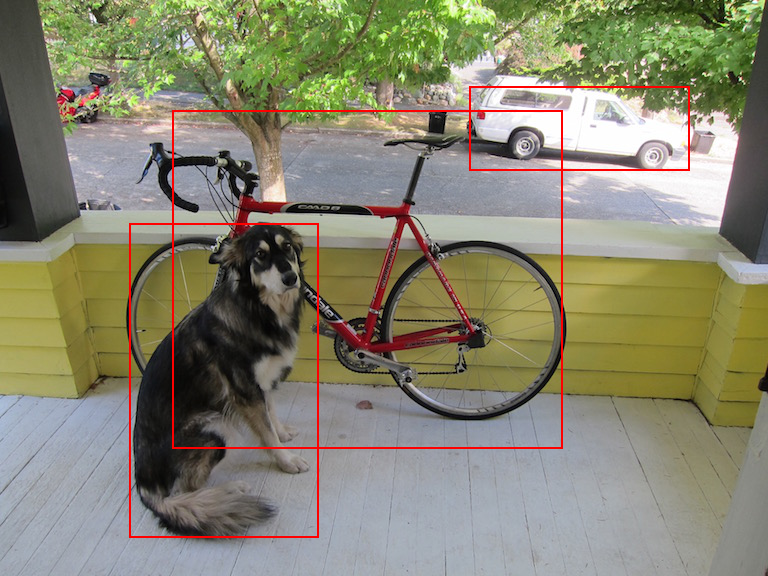

In [11]:
img